<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#ECDF-and-Functions" data-toc-modified-id="ECDF-and-Functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ECDF and Functions</a></span></li><li><span><a href="#Scatter-Plots" data-toc-modified-id="Scatter-Plots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Scatter Plots</a></span></li><li><span><a href="#Swarm-Plots" data-toc-modified-id="Swarm-Plots-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Swarm Plots</a></span></li></ul></div>

## Description
Visualization is one of the essential skills in data science. It helps us get a better feeling of
the data at hand. In this problem, we are going to get familiar with visualization in python using the iris dataset. Refer to sklearn documentation for finding the proper commands.

**Note**: All of your plots in this notebook should have these attributes:
* Title
* X label
* Y label

## Import 
Put all of your imports in the cell below.

In [42]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math as math
import numpy as np
import pandas as pd
import seaborn as sns

## Loading Dataset
* Load the iris dataset from sklearn library. 
* Display the keys of the dataset and print the discription. 

In [31]:
iris = datasets.load_iris()
features = iris['feature_names']
print(features)
target_names = iris['target_names']
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## Histograms
Use matplotlib library and plot the histogram of petal length (one of the four features) [petal length is third number] for Versicolor (one of the species of iris). [Versicolor target is 1]

**Note**: Set the number of bins equal to the square root of the number of Versicolor data points. 

Text(0, 0.5, 'number in dataset')

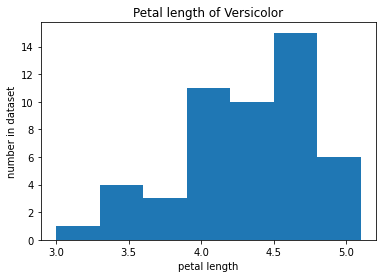

In [28]:
data = iris['data']
target = iris['target']

pen_len = data[target == 1, 2]

plt.hist(pen_len, bins = math.floor(math.sqrt(len(pen_len))))
plt.title('Petal length of Versicolor')
plt.xlabel('petal length')
plt.ylabel('number in dataset')

## ECDF and Functions 

Write a function that takes a one-dimensional NumPy array as input and returns two arrays of x and y which together are going to draw an empirical distribution function or ECDF. 

In [10]:
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = (np.arange(n) + 1)/n
    return (x, y)

Plot the ECDF of petal length for all three species in a single window.

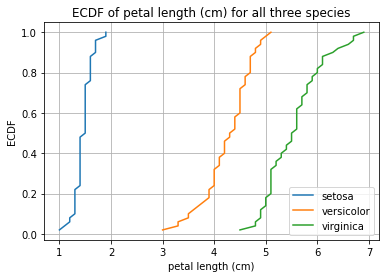

In [36]:
petal_length_setosa_tuple = ecdf(data[target == 0, 2])
petal_length_versicolor_tuple = ecdf(data[target == 1, 2])
petal_length_virginica_tuple = ecdf(data[target == 2, 2])


plt.plot(petal_length_setosa_tuple[0], petal_length_setosa_tuple[1])
plt.plot(petal_length_versicolor_tuple[0], petal_length_versicolor_tuple[1])
plt.plot(petal_length_virginica_tuple[0], petal_length_virginica_tuple[1])

plt.title('ECDF of ' + features[2] +' for all three species')
plt.xlabel(features[2])
plt.ylabel('ECDF')
plt.legend(target_names)
plt.grid()

Your plot should look like something like this:

![](img1.png)

**Note**: The graph above was plotted for some exponential distributions and your answer will look different.

Repeat the last section for the other three features.

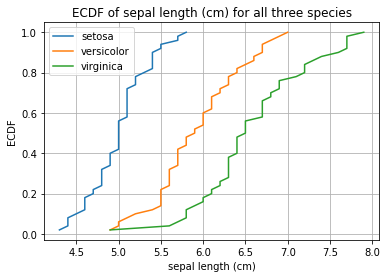

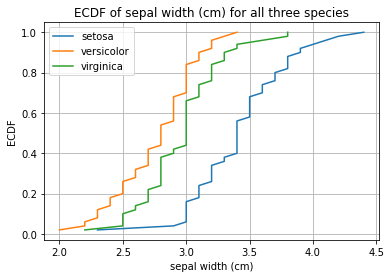

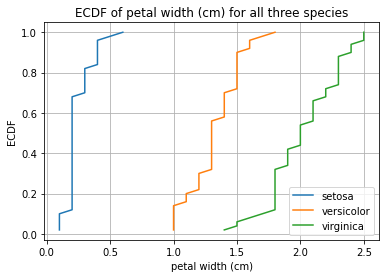

In [37]:
for f in [0, 1, 3]:
    setosa_tuple = ecdf(data[target == 0, f])
    versicolor_tuple = ecdf(data[target == 1, f])
    virginica_tuple = ecdf(data[target == 2, f])
    
    plt.figure()
    
    plt.plot(setosa_tuple[0], setosa_tuple[1])
    plt.plot(versicolor_tuple[0], versicolor_tuple[1])
    plt.plot(virginica_tuple[0], virginica_tuple[1])

    plt.title('ECDF of ' + features[f] +' for all three species')
    plt.xlabel(features[f])
    plt.ylabel('ECDF')
    plt.legend(target_names)
    plt.grid()

## Scatter Plots

Plot six two-dimensional scatter plots for every two features.

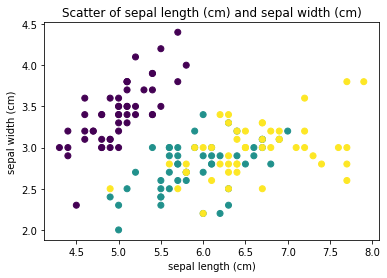

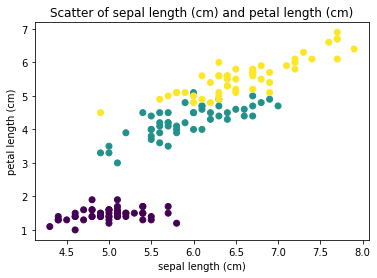

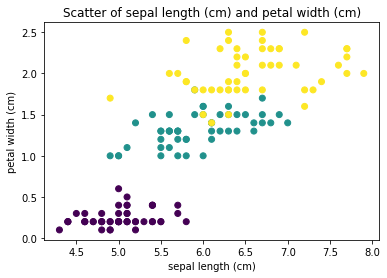

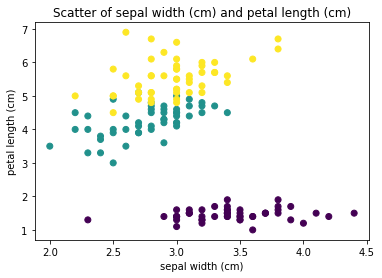

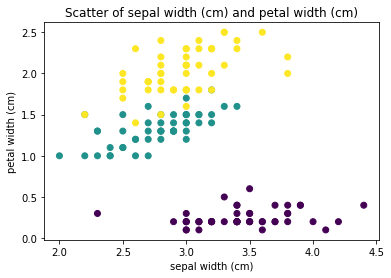

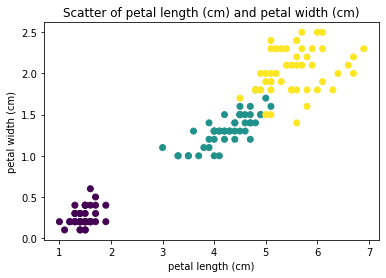

In [39]:
for i in range(4):
    for j in range(i+1, 4):

        plt.figure()

        plt.scatter(data[:, i], data[:, j], c = target)

        plt.title('Scatter of ' + features[i] + ' and ' + features[j])
        plt.xlabel(features[i])
        plt.ylabel(features[j])

An example for scatter plots:

![](img2.png)

Compute the covariance of two random variables petal length and petal width for Versicolor using NumPy.

In [40]:
np.cov(np.array([data[target == 1, 2], data[target == 1, 3]]))

array([[0.22081633, 0.07310204],
       [0.07310204, 0.03910612]])

## Swarm Plots

First, import pandas and seaborn libraries. Then convert the sklearn dataset you had to a data frame. Draw four [swarm plot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) that should look like this:

![](img3.png)

The Y-axis represents one of your features each time, and the columns in the X-axis represent different species of iris.

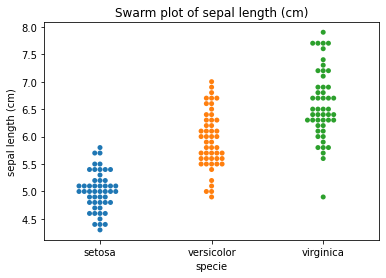

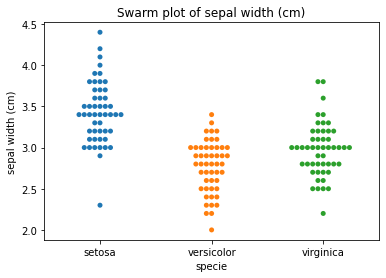

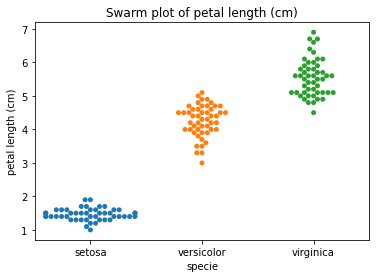

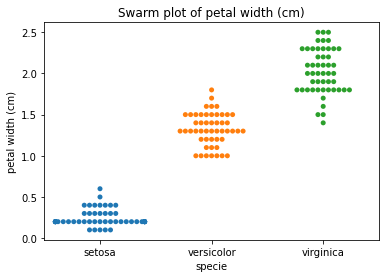

In [53]:
df = pd.DataFrame(data, columns = features)
df['specie'] = target_names[target]

for i in range(4):
    plt.figure()
    
    sns.swarmplot(x="specie", y=features[i], data=df)
    plt.title('Swarm plot of ' + features[i])

**Question**: According to the plots above, breifly explain which of the four features best differentiates between the three species of iris? (the prominent feature that helps us classify our data)

Well, two first features (that are related to speal) are not realy good features because different species have lots of commen valuse and we can not seprate them easily. For two last features they are good and as we can see above with petal length or petal width we can completely seprate setosa specie just with a easy threshold species are better sepra 